<a href="https://colab.research.google.com/github/OldGoose/ORA-Project-Santa-2021---The-Merry-Movie-Montage/blob/main/Santa_2021_TSP_ACO_Robin_Houston%26Egan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Best superpermutation with ACO

In this notebook, we use 7! superpermutation which from Robin Houston to our initial data. The flowchart as below:
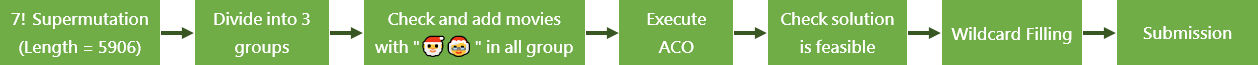

#### REFERENCES
https://www.kaggle.com/adrienbouvais/ants-for-santa-an-ant-colony-optimization   \
https://www.kaggle.com/yosshi999/wildcard-postprocessing-using-dynamic-programming

### Import Package

In [22]:
import itertools
import random
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import datetime
from tqdm.notebook import tqdm
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Santa2021') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. 7! Supermutation
We can get the superpermutation for n = 7 from Robin Houston and Egan which length 5906 on 27 February 2019.

In [23]:
best = "12345671234561723456127345612374561327456137245613742561374526137456213745612347561324756134275613472561347526134756213475612345761234516723451627345162374516234751623457162345176234512673451263745126347512634571263451726345127634512367451236475123645712364517236451273645123764512346751234657123465172346512734651243765124367512436571243651724365127436512473651246375124635712463517246351274635124763512467351426735146273514672351467325146735216473521674352167345216374521634752163457216345271634521764352176453271645327614532764153276451326745132647513264571326451732645137264531726453712645372164537261453726415372645132764531276453217645231764521376452173654217365241736521473652174365217346521736452176345216735421637542163574216354721635427163542176354216735241637524163572416352741635247163524176352416735214673512465371246531724653127465312476531246753142675314627531467253146752316475321647531264753162475316427531647253164752316745321674531267453162745316724531674253167452316754231675243167523416752314675321467531246573124651372465132746513247651324671532467135246713254671235467125346712543671524367154236715432675143267541326754312675432167543261745362174536127453617245361742536174523617453261743526174325617432651742365174263517426531742651374265173426157342617534216753421765342175634217536421753462175342617354261734526173425617342651743261574362157436125743162574312657413265741236574126357412653741265734126574312567413256741235674125367412563741256734125674312576413257614325761342576132457613254761325746132576412357641253761425376124537612543761524376154237615432761543726154376215437612534761253746125376412573641257634125764312574631257436152743615724361574236157432617543621754361275436172543617524361754236175432671543627154367215436712546371254673125476312547361524736154273615472361547326145736214576321475632147653214763521476325147632154763214576231457621345762143576214537621457361245736142573614527361457236145732614753621475361247536142753614725361475236147532614735261473256147326514723651472635147265314726513472651437265147326154736215473612547316254731265471326547123654712635471265347126543716253471625374162537146253716425371624537162543716524371654237165432716543721654371265473125647132564712356471253647125634712564372156437251643275614327564132756431275643217564327156432751643257163425176342516734251637425163472516342751634257163245176324516732451637245163274516324751632457163254716325741632571463275146327154632714563271465327146352714632571643527164357216435712643517264351276435126743512647351264375126435716243517624351672435162743516247351624375162435716423517642351674235164723516427351642375146237514263751423675142376514273651427635142765314276513427651432765142375614235761423567143256714352671435627143567214356712435617243561274356124735612437561243576124356714235617423561472356142735614237516423571643251764325167432516473251643725614372564137256431725643712564731254671324567132465713246751324615732461753246173524617325416723541762354716235476123547621354762315467231546273154623715462317564231576421356742135647213564271356421735624137562413576241356724135627413562471356241735621473562174356217345621735462173564213756421357642153746215374261537421653742156374215367421537642157364215763421576432157642315674231564723156427315642371564231756243157624315672431562743156247315624371562431756234157623415672341562734156237415623471562341756231475623174562317546321745632174653217463521746325174632157463217546312754631725463175246315724631527463152476315246731524637152463175426315742631547263154276315426731542637154263175462315746235174623571462357416235746123574621357462315476235147623541726354172365417235641723546172354167253417625314762531746253176425317624531762543176524317654231765432176543127654317265431762534172653417256341725364172534617253416725431672541367251436725134672153476215347261534721653472156347215364721534672135467213456721346572136457213654721365742136572413657214365721346752136475213674521367542136752413675214376521437562143752614375216437521463725146372154637214563721465372146357214637521436752134672513647251367425136724513672541637254167325417632541736251473625174362517346257136425713624571362547136257413625714362571346275136427513624751362745136275416327541623754126375412367541237654132765413726541376251437625134762513746251376425137624513762541376524137654213765412375641237546132754613725461375246137542613754621375461237541627354126735412763541273654127356412735461273541627534126753412765341275634127536412753461275341627543162754136275143627513462715342671354267134526713425671342657143265714236571426357142653714265731426571342675134267153427615342716534271563427153642715346271354627134562713465271364527136542713652471365274136527143652713462573146257341625734612573462157346251736425173624517362541732654173256417325461732456173246517324615372461532746153247615324167532416573214657321645731264573162457316425731645273165427316524731652743165273416527314652731645723165472316574231657243165723416572314657231645732165473216574321657342165732416537241653274165324716532417653241567321456731245637124563172456312745631247563124576312456731425637142563174256314725631427563142576314256731452637145236714532671453627145367214536712453671425367145237614523716452371465237416523746152347651234765213476523147652341765234716523476152346715234617523461572346152734615237465123746521374652317465237145623714526317452631475263145726314527631452673145627314567231456732154673215647321567432156734215673241563724156327415632471563241756324157632415367241536274153624715362417536241573624153762415326741532647153264175326415732641523764152367415236471523641752364157236415273641526374152634715263417526341572634152763415267341526437152643175264315726431527643152674315264731526413752641357261435726134572613547261357426135724613572641352761435276134527613542761352476135274613527641352674135264713526417352641"
len(best)

5906

### 1. Divide into 3 groups
From this formula $𝑝_𝑘^𝑛 = \frac{𝑛!}{(𝑛−𝑘)!}$ we can get the following seven symbols (🎅🤶🦌🧝🎄🎁🎀) with a total of 5040 permutations (ie, a total of 5040 movie)
Due to the constrain of the problem, there are a total of 120 movies starting with these 🎅🤶 two symbols, and we have to put them into each group.
After deducting those 120 films, we divide the remaining 4920 films into three equal parts.

First, we need to decide which code is represent 🎅🤶.

In [24]:
split_id = [len(best) // 3, len(best)*2//3]
t1, t2 = split_id

strings = [best[:t1], best[t1:t2], best[t2:]]
g1 = strings[0]
g2 = strings[1]
g3 = strings[2]

check = []
for i in range(1,8):
    for j in range(1,8):
        if i != j:
            check.append(str(i)+str(j))
check = np.array(check)

data = pd.DataFrame()
column = list(check)
index = ['group1','group2','group3']
data = pd.DataFrame(columns=column,index=index)

for i in list(check):
    data[i][0] = (g1.count(i))
    data[i][1] = (g2.count(i))
    data[i][2] = (g3.count(i))
data = data.append(data.std(axis= 0) ,ignore_index=True)
data1 = data.T[3]
for i in range(len(data1)):
    if data1[i] == data1.min(axis=0):
        min_id = (data1.index[i]) 
print("The Min Standard Deviation is: " + str(data.stack().min()) + " at "  + (min_id) + ".")

The Min Standard Deviation is: 0.5773502691896258 at 24.


So, we choose 24 to represent the 🎅🤶.

In [25]:
def is_perm(s):
    y = True
    for k in range(1,8):
        y = y&(str(k) in s)
        if not y: break
    return y

permutations = []

for k in range(len(best)-6):
    s = best[k:k+7]
    if (is_perm(s))&(s not in permutations)&(s[:2]!='24'):
        permutations.append(s)
        
print('There are',len(permutations),'movies')

mandatory = ['24'+''.join(x) for x in itertools.permutations(['1','3','5','6','7'], 5)]
print('In addition',len(mandatory),'which movie starting with 🎅🤶 must appear in each group.')

There are 4920 movies
In addition 120 which movie starting with 🎅🤶 must appear in each group.


In [26]:
#find the split point
split_id = [len(permutations) // 3, len(permutations)*2//3]
t1, t2 = split_id

adjust1 = 0
adjust2 = 0
group1 = permutations[:t1-adjust1] + mandatory
group2 = permutations[t1-adjust1:t2+adjust2] + mandatory
group3 = permutations[t2+adjust2:] + mandatory

len(group1), len(group2), len(group3)

(1760, 1760, 1760)

### 3. Check and add movies with "🎅🤶" in all group.

In [27]:
all_permutations = [''.join(x) for x in itertools.permutations(['1','2','3','4','5','6','7'], 7)]

for p in all_permutations:
    if p not in group1 and p not in group2 and p not in group3:
        print(p)

### 4.Execute ACO

In [28]:
# The ant class
class Ant:
    def __init__(self, map):
        self.map = map
        self.visited = np.ones((self.map.nb_city,), dtype = bool)  # Boolean of if the city has been visited
        self.position_id = self.map.city.index(random.choice(self.map.city))  # Id of current position
        self.visited[self.position_id] = 0
        self.dist_trav = 7  # Distance traveled
        self.path = self.map.city[self.position_id] # What we are looking for
        self.path_id = [0] * self.map.nb_city # History of the path for pheromones
        self.path_id[0] = self.position_id
        self.path_act_id = 1

    def update(self):
        dis, phero = self.map.dist_mat[self.position_id, :], self.map.pheros[self.position_id, :]
        dis[dis < 0] = self.map.inf_dist

        weight = (self.visited * phero) / ((dis * 2) ** self.map.coef_dist_puiss)

        next_city_id = random.choices(range(self.map.nb_city), weights=weight, k=1)[0]

        self.path += self.map.city[next_city_id][(7-int(dis[next_city_id])):]
        self.path_id[self.path_act_id] = next_city_id
        self.path_act_id += 1

        self.dist_trav += self.map.dist_mat[self.position_id, next_city_id]
        self.position_id = next_city_id
        self.visited[self.position_id] = 0

    def find_path(self):
        for i in range(self.map.nb_city-1):
            self.update()

    def update_pheros(self):
        x = 100
        coef = -50
        for i in range(x):
            if self.dist_trav <= (self.map.dist_min + self.map.dist_delta * (i / x)):
                coef += 1
        for i in range(len(self.path_id)-1):
            self.map.pheros[self.path_id[i], self.path_id[i+1]] += coef

# The map class
class Map:
    # Settings
    phero_start_fact = 1000
    inf_dist = 9999

    def __init__(self, city, dist_mat, name, coef_dist_puiss=20,
                 nb_ant=20, nb_turn=100, do_print=True):
        self.city = city # List of city to travel
        self.name = name # Name of the map
        self.nb_ant = nb_ant # Number of ants
        self.nb_turn = nb_turn # Number of turn to do
        self.dist_mat = dist_mat # Distance matrix
        
        #建立一個Array矩陣，每個欄位並乘以費洛蒙初始值 1000
        self.pheros = np.ones(self.dist_mat.shape) * self.phero_start_fact # Pheromones matrix (信息素矩陣)
        
        self.shortest_path = "" #設定初始最短路徑為空值
        self.shortest_dist = 9999999999999  #設定初始最短距離為極大值
        self.dist_min = 0
        self.dist_max = 0
        self.dist_delta = 0 #設定距離delta為0
        self.nb_city = len(city) #定義一個程式數目的變數

        self.coef_dist_puiss = coef_dist_puiss # Coef to use in ant.update, 5-10 is good
        self.ants = [] # List of ant
        for i in range(self.nb_ant):
            self.ants.append(Ant(self))

        self.pbar = None # The progress bar

    def update(self):
        ants_dist = [0] * len(self.ants)
        i = 0
        
        for ant in self.ants:
            ant.find_path()
            dis = ant.dist_trav
            ants_dist[i] = dis
            if dis < self.shortest_dist:
                self.shortest_dist = dis
                self.shortest_path = ant.path
            i+=1
            self.pbar.update(1)
        self.dist_min = min(ants_dist)
        self.dist_max = max(ants_dist)
        self.dist_delta = self.dist_max - self.dist_min
        for ant in self.ants:
            ant.update_pheros()
            ant.__init__(self)

    def start(self):
        # Start the simulation
        with tqdm(total=self.nb_turn*self.nb_ant, desc=self.name,unit="ant") as pbar:
            self.pbar = pbar
            for i in range(self.nb_turn):
                self.update()

In [29]:
dist_mat = pd.read_csv("distance_matrix.csv")
dist_mat.set_index('Permutation', inplace=True)

# 將圖案轉換為數字符號
def change(a):
    a = a.replace("🎅", "2")
    a = a.replace('🤶', "4")
    a = a.replace('🦌', "1")
    a = a.replace('🧝', "3")
    a = a.replace('🎄', "5")
    a = a.replace('🎁', "6")
    a = a.replace('🎀', "7")
    return a

def rechange(a):
    a = a.replace("2", "🎅")
    a = a.replace("4", '🤶')
    a = a.replace("1", '🦌')
    a = a.replace("3", '🧝')
    a = a.replace("5", '🎄')
    a = a.replace("6", '🎁')
    a = a.replace("7", '🎀')
    return a

def get_dist_mat(dist_mat, city):
    to_export = pd.DataFrame(columns=city, index=city) #生成一個n x n的dataframe矩陣
  
    for c in city:
        to_export.loc[c] = dist_mat.loc[c] #找出dist_mat之中，相同的city對應的欄位值，將距離填入to_export對應的欄位中(https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/462517/)

    to_export = to_export.to_numpy() #將to_export型態由dataframe轉為array型態
    to_export[to_export==0] = 99999 #將to_export裡面為0的值改為99999

    return to_export

# 建立字典，將dist_mat裡面的欄跟列的名稱改換為數字字符
dic = {}
for c in dist_mat.columns:
    dic[c] = change(c)
dist_mat.rename(dic, axis=1, inplace=True)
dist_mat.rename(dic, axis=0, inplace=True)

#### Set papameter

In [30]:
nb_ant = 5 #number of ants
nb_turn = 30 # Number of turn to do
coef_dist_puiss = 55

print("The calculation will take approximately " + str(datetime.timedelta(seconds=(1.2 * 3 * nb_ant * nb_turn))))
print('Start for nb_ant:', nb_ant, ', nb_turn', nb_turn, )

dist_mat_map_1 = get_dist_mat(dist_mat, group1)
map_1 = Map(group1, dist_mat_map_1, "map_1", nb_ant=nb_ant, nb_turn=nb_turn,
            coef_dist_puiss=coef_dist_puiss, do_print=False)

map_1.start()
print("map_1 Done, score:", map_1.shortest_dist, 'Nb_city:', len(group1))

dist_mat_map_2 = get_dist_mat(dist_mat, group2)
map_2 = Map(group2, dist_mat_map_2, "map_2", nb_ant=nb_ant, nb_turn=nb_turn,
            coef_dist_puiss=coef_dist_puiss, do_print=False)
map_2.start()
print("map_2 Done, score:", map_2.shortest_dist, 'Nb_city:', len(group2))

dist_mat_map_3 = get_dist_mat(dist_mat, group3)
map_3 = Map(group3, dist_mat_map_3, "map_3", nb_ant=nb_ant, nb_turn=nb_turn,
            coef_dist_puiss=coef_dist_puiss, do_print=False)
map_3.start()
print("map_3 Done, score:", map_3.shortest_dist, 'Nb_city:', len(group3))


The calculation will take approximately 0:09:00
Start for nb_ant: 5 , nb_turn 30


map_1:   0%|          | 0/150 [00:00<?, ?ant/s]

map_1 Done, score: 2693 Nb_city: 1760


map_2:   0%|          | 0/150 [00:00<?, ?ant/s]

map_2 Done, score: 2683 Nb_city: 1760


map_3:   0%|          | 0/150 [00:00<?, ?ant/s]

map_3 Done, score: 2683 Nb_city: 1760


### 5. Check solution is feasible

In [31]:
string1 = (map_1.shortest_path)
string2 = (map_2.shortest_path)
string3 = (map_3.shortest_path)

In [32]:
all_permutations = [''.join(x) for x in itertools.permutations(['1','2','3','4','5','6','7'], 7)]

for p in all_permutations:
    if p not in string1 and p not in string2 and p not in string3:
        print(p)
              
for p in mandatory:
    if p not in string1 and p not in string2 and p not in string3:
        print(p)
#No News is good news.

In [33]:
result_list = [string1, string2, string3]
for i in result_list:
  print('The length for each grop without wildcards' +  str(len(i)))

The length for each grop without wildcards2693
The length for each grop without wildcards2683
The length for each grop without wildcards2683


In [34]:
sub = pd.DataFrame()
sub['schedule'] = [string1, string2, string3]
schedule = sub.schedule.tolist()

### 6. Using Dynamic Programming to filling the 🌟

#### Create Cost martix

In [35]:
perms = list(map(lambda p: "".join(p), itertools.permutations("1234567")))
perm2id = {p: i for i, p in enumerate(perms)}

perms_arr = np.array([list(map(int, p)) for p in perms])
perms_arr.shape

perms_onehot = np.eye(7)[perms_arr-1, :].transpose(0, 2, 1)
assert np.allclose(perms_onehot[:,0,:].astype(np.int64), (perms_arr == 1).astype(np.int64))

must_match_left2right = np.array([-1, -1, -1, -1, -1, -1, -1, 7, 6, 5, 4, 3, 2, 1, 0])
must_match_right2left = np.array([0, 1, 2, 3, 4, 5, 6, 7, -1, -1, -1, -1, -1, -1, -1])
cost_ifmatch = np.array([7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7])

M = F.conv2d(
    F.pad(torch.Tensor(perms_onehot[:, None, :, :]), (7, 7)),
    torch.Tensor(perms_onehot[:, None, :, :]),
    padding="valid"
).squeeze().numpy()

must_match_left2right = np.array([-1, -1, -1, -1, -1, -1, -1, 7, 6, 5, 4, 3, 2, 1, 0])
must_match_left2right_wild = np.array([-1, -1, -1, -1, -1, -1, -1, 6, 5, 4, 3, 2, 1, 0, 0])

cost_ifmatch = np.array([7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7])

costMat = np.where(M == must_match_left2right, cost_ifmatch, np.inf).min(axis=-1).astype(np.int8)
costMatWild = np.minimum(costMat, np.where(M == must_match_left2right_wild, cost_ifmatch, np.inf).min(axis=-1)).astype(np.int8)

#### String decomposition

In [36]:
perms = [''.join(x) for x in itertools.permutations(['1','2','3','4','5','6','7'], 7)]

def find_strings_perms(strings, verbose=False):
    global perms
    found_perms = []
    for s in strings:
        found_perms.append([])
        for i in range(len(s)-6):
            p = s[i:i+7]
            if p in perms:
                found_perms[-1].append(p)
    if verbose:
        lens = [len(_) for _ in  found_perms]
        print(f'There are {lens} permutations in strings, {sum(lens)} in total.')
        lens = [len(set(_)) for _ in  found_perms]
        print(f'There are {lens} unique permutations in strings, {sum(lens)} in total.')
    return found_perms

def rebalance_perms(strings_perms, verbose=False):
    # convert to dicts for fast lookup and to keep permutations order
    strings_perms = [dict.fromkeys(_) for _ in strings_perms] 
    for p in strings_perms[0].copy():  # iterate over the copy to allow modification during iteration
        if p[:2] != "12" and (p in strings_perms[1] or p in strings_perms[2]):
            strings_perms[0].pop(p)
    for p in strings_perms[1].copy():
        if p[:2] != "12" and p in strings_perms[2]:
            strings_perms[1].pop(p)
    if verbose:
        lens = [len(_) for _ in  strings_perms]
        print(f'There are {lens} permutations left in strings after rebalancing, {sum(lens)} in total.')
    return [list(_) for _ in strings_perms] 

In [38]:
found_perms = find_strings_perms(schedule, verbose=True)
balanced_perms = rebalance_perms(found_perms, verbose=True)

There are [1988, 2007, 2012] permutations in strings, 6007 in total.
There are [1936, 1946, 1955] unique permutations in strings, 5837 in total.
There are [1518, 1581, 1955] permutations left in strings after rebalancing, 5054 in total.


#### Run

In [40]:
nodes_list = []
table_list = []
for i in range(3):
    word = balanced_perms[i]
    nodes = [perm2id[p] for p in balanced_perms[i]]

    table = np.zeros((len(nodes), 10), np.int64)
    table[0, :] = 7
    for i in range(1, len(nodes)):
        e = costMat[nodes[i-1], nodes[i]]
        ew = costMatWild[nodes[i-1], nodes[i]]
        table[i,0] = table[i-1,0] + e
        table[i,1] = min(table[i-1,1] + e, table[i-1,0] + ew)
        table[i,2] = min(table[i-1,2], table[i-1,1]) + e # TODO: better transition
        table[i,3] = min(table[i-1,3], table[i-1,2]) + e
        table[i,4] = min(table[i-1,4], table[i-1,3]) + e
        table[i,5] = min(table[i-1,5], table[i-1,4]) + e
        table[i,6] = min(table[i-1,6], table[i-1,5]) + e
        table[i,7] = min(table[i-1,7], table[i-1,6]) + e
        table[i,8] = min(table[i-1,8], table[i-1,7]) + e
        table[i,9] = min(table[i-1,9] + e, table[i-1,8] + ew)
    print(table[-1].min(), table[-1])
    nodes_list.append(nodes)
    table_list.append(table)
    
# backtrack
new_words = []
wilds = []
for nodes, table in zip(nodes_list, table_list):
    ns = [perms[nodes[-1]]]
    track = np.argmin(table[-1])
    wild = []
    for i in range(len(nodes)-2, -1, -1):
        e = costMat[nodes[i], nodes[i+1]]
        ew = costMatWild[nodes[i], nodes[i+1]]
        if track == 0:
            ns.append(perms[nodes[i]][:e])
        elif track == 1:
            if table[i, 1] + e < table[i, 0] + ew:
                ns.append(perms[nodes[i]][:e])
            else:
                left = np.array(list(map(int, perms[nodes[i]][ew:])))
                right = np.array(list(map(int, perms[nodes[i+1]][:-ew])))
                mis = np.where(left != right)[0][0]
                wild.append(table[i, track-1]-7+ew+mis)
                ns.append(perms[nodes[i]][:ew])
                track = track - 1
        elif 2 <= track <= 8:
            if table[i, track] >= table[i, track-1]:
                track = track - 1
            ns.append(perms[nodes[i]][:e])
        elif track == 9:
            if table[i, 9] + e < table[i, 8] + ew:
                ns.append(perms[nodes[i]][:e])
            else:
                ns.append(perms[nodes[i]][:ew])
                left = np.array(list(map(int, perms[nodes[i]][ew:])))
                right = np.array(list(map(int, perms[nodes[i+1]][:-ew])))
                mis = np.where(left != right)[0][0]
                wild.append(table[i, track-1]-7+ew+mis)
                track = track - 1
        else:
            assert False
    assert track == 0
    wilds.append(wild)
    nsw = list("".join(ns[::-1]))
    for w in wild:
        nsw[w] = "*"
    new_words.append("".join(nsw))

2178 [2180 2179 2179 2179 2179 2179 2179 2179 2179 2178]
2299 [2304 2301 2301 2301 2301 2301 2301 2301 2301 2299]
2681 [2683 2681 2681 2681 2681 2681 2681 2681 2681 2681]


In [43]:
print("score: ", max(map(len, schedule)), "->", max(map(len, new_words)))

score:  2693 -> 2681


### 7. Submission

In [47]:
symbols = "🎅🤶🦌🧝🎄🎁🎀🌟"
submission = pd.Series([a.translate(str.maketrans("2413567*", symbols)) for a in new_words], name='schedule')
submission.to_csv('submission.csv', index=False)